In [10]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt
import math

In [11]:
def convolve_im(im: np.array, kernel: np.array, verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)

    kernel_verbose = np.fft.fftshift(kernel)

    im_fft_verbose = abs(np.log((np.fft.fftshift(np.fft.fft2(im)))))

    transformed = (np.fft.fft2(im) * kernel)
    new_kernel = np.ones(im.shape)
    transformed_verbose = np.log(1+abs((np.fft.fftshift(np.real(transformed)))))

    inversed = np.fft.ifft2(transformed)

    conv_result = np.real((inversed))

    ### END YOUR CODE HERE ###
    return conv_result

28
(538, 464)
Saving image to: image_processed/moon_filtered.png


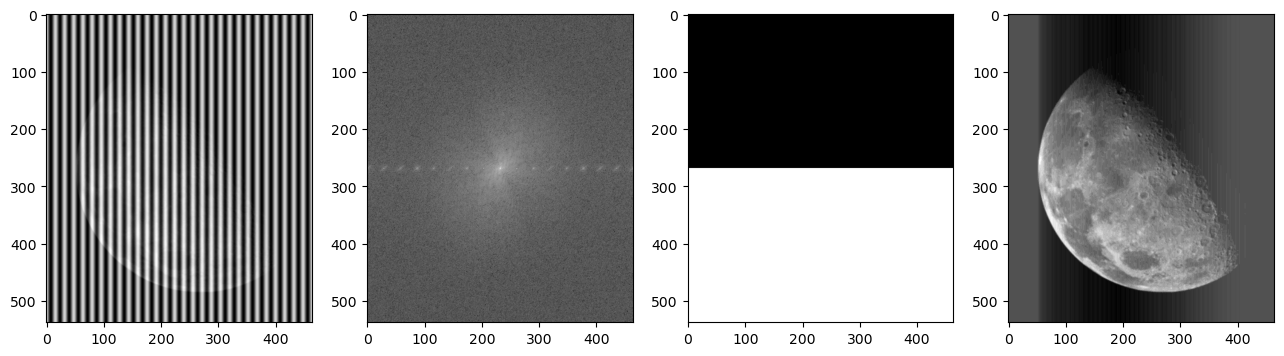

In [15]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)
    
    # for analysis
    im_fft = np.fft.fft2(im)

    # creating low pass kernel
    kernel = np.ones(im.shape)
    for i in range(kernel.shape[0]//2):
        kernel[i,:] = np.zeros(im.shape[1])

    convolved_im = convolve_im(im, kernel)


    plt.figure(figsize=(20, 4))

    # Visualize original image
    plt.subplot(1, 5, 1)
    plt.imshow(im, cmap="gray")

    # Visualize FFT
    plt.subplot(1, 5, 2) 
    plt.imshow(np.log(abs(np.fft.fftshift(im_fft))), cmap="gray")

    # # Visualize FFT kernel
    plt.subplot(1, 5, 3)
    plt.imshow(kernel, cmap="gray")

    # # Visualize filtered FFT image
    plt.subplot(1, 5, 4)
    plt.imshow(convolved_im, cmap="gray")

    ### END YOUR CODE HERE ###
